<a href="https://colab.research.google.com/github/anjalibalu123/clustering-nlp/blob/main/my_project(ml).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***AIRLINE PASSENGER SATISFACTION PREDICTION***


## About dataset
 Measuring customer satisfaction is a key element for modern businesses as it can significantly contribute to a continuing effort of service quality improvement.In order to meet customer expectations and achieve higher quality levels,airlines need to develop a specific mechanism of passenger satisfaction measurement

## **Importing packages**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/train.csv')
df


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


### ***Drop colums***

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop(['id'],axis=1,inplace=True)
df
#droping coloum(Unnamed: 0)since it does not contribute accuracy

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


## ***check the missing values***

In [ ]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

## ***filling missing values***

In [ ]:
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes']).mean()

to check the datatypes

In [ ]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## **Shape of the dataset**

In [ ]:
df.shape

(103904, 23)

## ***Label Encoder***

In [ ]:
from sklearn.preprocessing import LabelEncoder #in machine learning encoding is a technique used convert categorical variables
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Customer Type']=le.fit_transform(df['Customer Type'])
df['Type of Travel']=le.fit_transform(df['Type of Travel'])
df['Class']=le.fit_transform(df['Class'])
df['satisfaction']=le.fit_transform(df['satisfaction'])
df


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,15.178678,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,15.178678,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,15.178678,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,15.178678,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,15.178678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,15.178678,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,15.178678,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,15.178678,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,15.178678,0


# ***separate X and Y***

In [ ]:
#(independent variable)
X=df.iloc[:,:-1] #by using this code,you are essentially creating a new DataFrame X that contains all the rows and all columns from the original DataFrame df,except for the last column
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,15.178678
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,15.178678
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,15.178678
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,15.178678
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,15.178678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,2,3,1,4,2,3,2,3,15.178678
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,5,4,0,15.178678
103901,1,1,30,0,0,1995,1,1,1,3,...,5,4,3,2,4,5,5,4,7,15.178678
103902,0,1,22,0,1,1000,1,1,1,5,...,1,1,4,5,1,5,4,1,0,15.178678


In [ ]:
#target(dependent variable)
y=df.iloc[:,-1]#by using this code,you are selecting the column of Dataframe df and assigning it to the variable y
y

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64

## **Value count**

In [ ]:
y.value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


## ***Visualization***

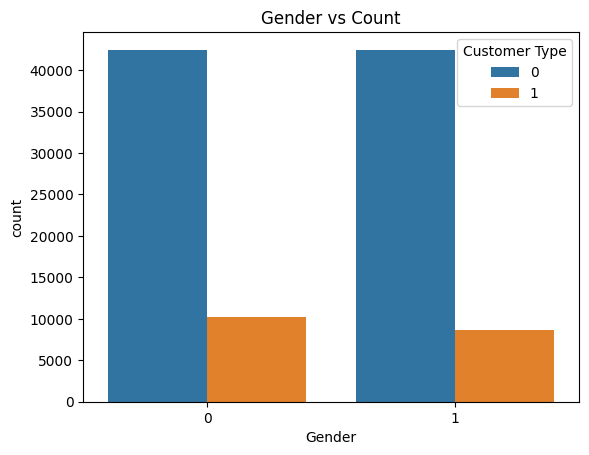

In [ ]:
plt.title('Gender vs Count')
sns.countplot(x='Gender',data=df,hue='Customer Type')
plt.show()
#from count plot it is clear that womens travelling (both personal travel and business travel equally) while men travels(have more personal Business travel)

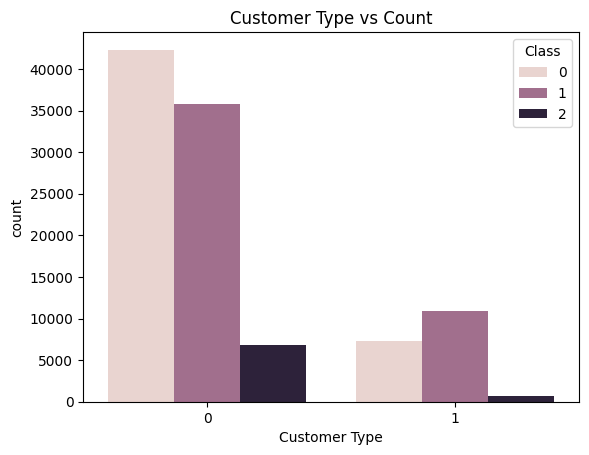

In [ ]:
plt.title('Customer Type vs Count')
sns.countplot(x='Customer Type',data=df,hue='Class')
plt.show()

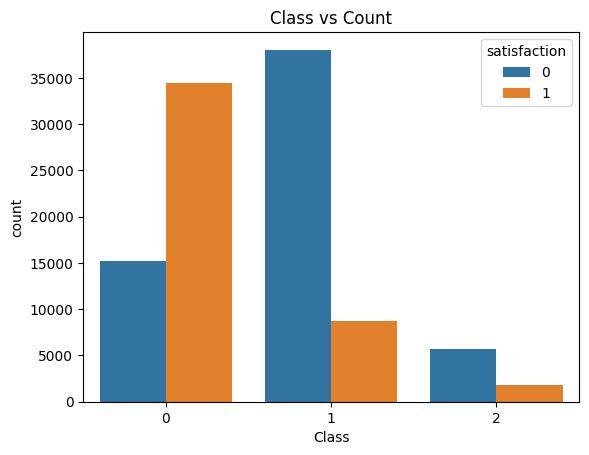

In [ ]:
plt.title('Class vs Count')
sns.countplot(x='Class',data=df,hue='satisfaction')
plt.show()

# **Data Scaling**

In [ ]:
#scaling using MinMaxscaler,to learn the dataset and fit and transform the value in 0-1 range then stored to variable X
from sklearn.preprocessing import MinMaxScaler# the choice of scaling method depends on the characteristics of dataset and requirement of ml algorithm being used.
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[1.00000000e+00, 0.00000000e+00, 7.69230769e-02, ...,
        1.00000000e+00, 1.57035176e-02, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 2.30769231e-01, ...,
        2.00000000e-01, 6.28140704e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.43589744e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 1.00000000e+00, 2.94871795e-01, ...,
        8.00000000e-01, 4.39698492e-03, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.92307692e-01, ...,
        2.00000000e-01, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 2.56410256e-01, ...,
        2.00000000e-01, 0.00000000e+00, 0.00000000e+00]])

## **Train Test Spilt**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

## *Creating classifier instances*

In [ ]:
knn=KNeighborsClassifier()
sv=SVC()
dtc=DecisionTreeClassifier()
Gnb=GaussianNB()
rfc=RandomForestClassifier()
adc=AdaBoostClassifier()

## **Creating a machine learning model**

In [ ]:
lst=[knn,sv,dtc,Gnb,rfc,adc]
for i in lst:
  print('***********',i,'***********')
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print("Accuracy score=",accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))
  y_new=i.predict(scaler.transform([['1','0','13','1','2','460','3','4','3','1','5','3','5','5','4','3','4','4','5','5','25','15.243658']]))
  if y_new==0:
    print("Not satisfied / neutral")
  else:
    print('satisfied')
#the classification report provides a detailed summary of the model's performance for each class in the dataset

*********** KNeighborsClassifier() ***********
Accuracy score= 92.76915180290004
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     17692
           1       0.95      0.88      0.91     13480

    accuracy                           0.93     31172
   macro avg       0.93      0.92      0.93     31172
weighted avg       0.93      0.93      0.93     31172

Not satisfied / neutral
*********** SVC() ***********
Accuracy score= 94.91851661747722
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     17692
           1       0.95      0.93      0.94     13480

    accuracy                           0.95     31172
   macro avg       0.95      0.95      0.95     31172
weighted avg       0.95      0.95      0.95     31172

Not satisfied / neutral
*********** DecisionTreeClassifier() ***********
Accuracy score= 94.34428333119467
              precision    recall  f1-score   support

           0   

<function matplotlib.pyplot.show(close=None, block=None)>

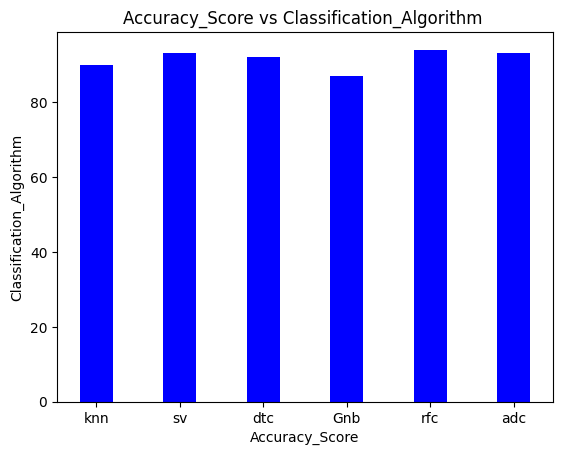

In [ ]:
x1=[90,93,92,87,94,93]
y1=['knn','sv','dtc','Gnb','rfc','adc']
plt.xlabel('Accuracy_Score')
plt.ylabel('Classification_Algorithm')
plt.title('Accuracy_Score vs Classification_Algorithm ')
import matplotlib.pyplot as plt
plt.bar(y1,x1,width=0.4,color='blue')
plt.show

from above evaluation Random forest classifier have best accuracy score while GaussianNB have worst accuracy

## ***Oversampling***

In [ ]:
#Oversampling is a technique used in the context of imbalanced datasets to balance the class distribution by increasing the number of instances in the minority class
from imblearn.over_sampling import SMOTE
oversample=SMOTE(random_state=1)
X_os,y_os=oversample.fit_resample(X,y)

In [ ]:
#train_test_split
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

In [ ]:
knn_os=KNeighborsClassifier()
sv_os=SVC()
dtc_os=DecisionTreeClassifier()
Gnb_os=GaussianNB()
rfc_os=RandomForestClassifier()
adc_os=AdaBoostClassifier()


In [ ]:
lst=[knn_os,sv_os,dtc_os,Gnb_os,rfc_os,adc_os]
for i in lst:
  print('***********',i,'***********')
  i.fit(X_train_os,y_train_os)
  y_pred_os=i.predict(X_test_os)
  print("Accuracy score=",accuracy_score(y_test_os,y_pred_os)*100)
  print(classification_report(y_test_os,y_pred_os))
  y_new=i.predict(scaler.transform([['1','0','13','1','2','460','3','4','3','1','5','3','5','5','4','3','4','4','5','5','25','15.243658']]))
  if y_new==0:
    print("Not satisfied / neutral")
  else:
    print('satisfied')

*********** KNeighborsClassifier() ***********
Accuracy score= 93.359375
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     17587
           1       0.95      0.92      0.93     17741

    accuracy                           0.93     35328
   macro avg       0.93      0.93      0.93     35328
weighted avg       0.93      0.93      0.93     35328

Not satisfied / neutral
*********** SVC() ***********
Accuracy score= 94.85110960144928
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     17587
           1       0.96      0.94      0.95     17741

    accuracy                           0.95     35328
   macro avg       0.95      0.95      0.95     35328
weighted avg       0.95      0.95      0.95     35328

Not satisfied / neutral
*********** DecisionTreeClassifier() ***********
Accuracy score= 95.03226902173914
              precision    recall  f1-score   support

           0       0.95

<function matplotlib.pyplot.show(close=None, block=None)>

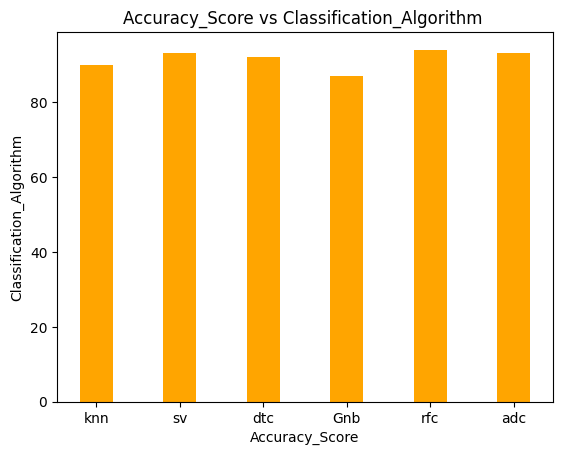

In [ ]:
x2=[90,93,91,85,94,92]
y2=['knn_os','sv_os','dtc_os','Gnb_os','rfc_os','adc_os']
plt.xlabel('Accuracy_Score')
plt.ylabel('Classification_Algorithm')
plt.title('Accuracy_Score vs Classification_Algorithm ')
import matplotlib.pyplot as plt
plt.bar(y1,x1,width=0.4,color='orange')
plt.show

from above evaluation Random forest classifier have best accuracy score while GaussianNB have worst accuracy

# ***Undersampling***

In [ ]:
#undersampling is a technique and used in machine learning to address class imbalance in datasets undersampling reduces majority class
from imblearn.under_sampling import RandomUnderSampler
undersampler=RandomUnderSampler(random_state=1)
X_us,y_us=undersampler.fit_resample(X,y)


In [ ]:
#train_test_split
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_us,y_us,test_size=0.3,random_state=1)

In [ ]:
knn_us=KNeighborsClassifier()
sv_us=SVC()
dtc_us=DecisionTreeClassifier()
Gnb_us=GaussianNB()
rfc_us=RandomForestClassifier()
adc_us=AdaBoostClassifier()

In [ ]:
lst=[knn_us,sv_us,dtc_us,Gnb_us,rfc_us,adc_us]
for i in lst:
  print('***********',i,'***********')
  i.fit(X_train_us,y_train_us)
  y_pred_us=i.predict(X_test_us)
  print("Accuracy score=",accuracy_score(y_test_us,y_pred_us)*100)
  print(classification_report(y_test_us,y_pred_us))
  y_new=i.predict(scaler.transform([['1','0','13','1','2','460','3','4','3','1','5','3','5','5','4','3','4','4','5','5','25','15.243658']]))
  if y_new==0:
    print("Not satisfied / neutral")
  else:
    print('satisfied')

*********** KNeighborsClassifier() ***********
Accuracy score= 92.88913566537109
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     13559
           1       0.95      0.91      0.93     13456

    accuracy                           0.93     27015
   macro avg       0.93      0.93      0.93     27015
weighted avg       0.93      0.93      0.93     27015

Not satisfied / neutral
*********** SVC() ***********
Accuracy score= 94.92133999629834
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     13559
           1       0.96      0.94      0.95     13456

    accuracy                           0.95     27015
   macro avg       0.95      0.95      0.95     27015
weighted avg       0.95      0.95      0.95     27015

Not satisfied / neutral
*********** DecisionTreeClassifier() ***********
Accuracy score= 94.22543031649084
              precision    recall  f1-score   support

           0   

<function matplotlib.pyplot.show(close=None, block=None)>

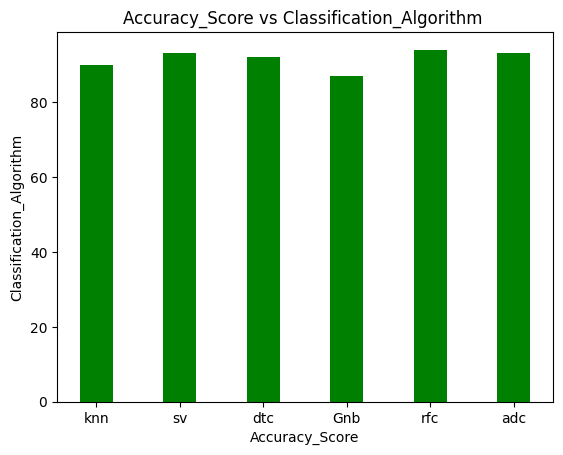

In [ ]:
x2=[90,93,91,85,94,92]
y2=['knn_os','sv_os','dtc_os','Gnb_os','rfc_os','adc_os']
plt.xlabel('Accuracy_Score')
plt.ylabel('Classification_Algorithm')
plt.title('Accuracy_Score vs Classification_Algorithm ')
import matplotlib.pyplot as plt
plt.bar(y1,x1,width=0.4,color='green')
plt.show

# **Hyperparameter Tuning**

Hyperparameter tuning also known as hyperparameter optimization, is the process of finding the best set of hyperparameters for machine learning model to achieve optimal performance

In [ ]:
from sklearn.model_selection import GridSearchCV #
param_grid = {'n_estimators':[50,100],
    'max_features': ['log2',None],
    'max_depth':[3,6],
    'max_leaf_nodes':[3,6]}
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=3, max_features='log2', max_leaf_nodes=6,
                       n_estimators=50)


In [ ]:
y_pred=grid_search.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
y_new=grid_search.predict(scaler.transform([['1','0','13','1','2','460','3','4','3','1','5','3','5','5','4','3','4','4','5','5','25','15.243658']]))
if y_new==0:
  print("Not Satisfied / Neutral")
else:
  print("Satisfied")

Not Satisfied / Neutral


In [ ]:
print('Accuracy score=',accuracy_score(y_test_os,y_pred_os)*100)
print(classification_report(y_test_os,y_pred_os))


Accuracy score= 93.1442481884058
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     17587
           1       0.93      0.93      0.93     17741

    accuracy                           0.93     35328
   macro avg       0.93      0.93      0.93     35328
weighted avg       0.93      0.93      0.93     35328



# ***conclusion***

from above observation it is noted that randomforest classifier with oversampling have maximum accuracy, precision, recall and f1-score while doing undersampling and hyperparameter tuning there no improvement in above mentioned perfomace parameters